<a href="https://colab.research.google.com/github/stephenbeckr/randomized-algorithm-class/blob/master/Demos/demo06_leverageScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demo for 1D leverages scores

Fig. 2 in Section 6.1 of "Randomized algorithms for matrices and data" (Mahoney, 2011, http://arxiv.org/abs/1104.5557 ) is misleading, since it discussing perturbing regressors *and* data 

Consider a 1D regression problem,
$$\min_{\beta} || x\cdot \beta - y ||_2$$
where $X$ is a $n \times 1$ vector of covariates, and $y$ are the data.

By perturbing $X$, we change the solution. This is captured by the leverages scores of $X$. Since $X$ is a vector, leverage scores are simply proportional
to the magnitude of each entry.

Therefore, the idea of "leverage" is that if we perturb entries of $x$ that have more leverage, i.e., that are large in magnitude, then the effect on the regression is greater. Do we observate that?

Stephen Becker, Oct 1 2021

In [26]:
import numpy as np
import numpy.linalg
from numpy.random import default_rng
rng = default_rng()
from matplotlib import pyplot as plt

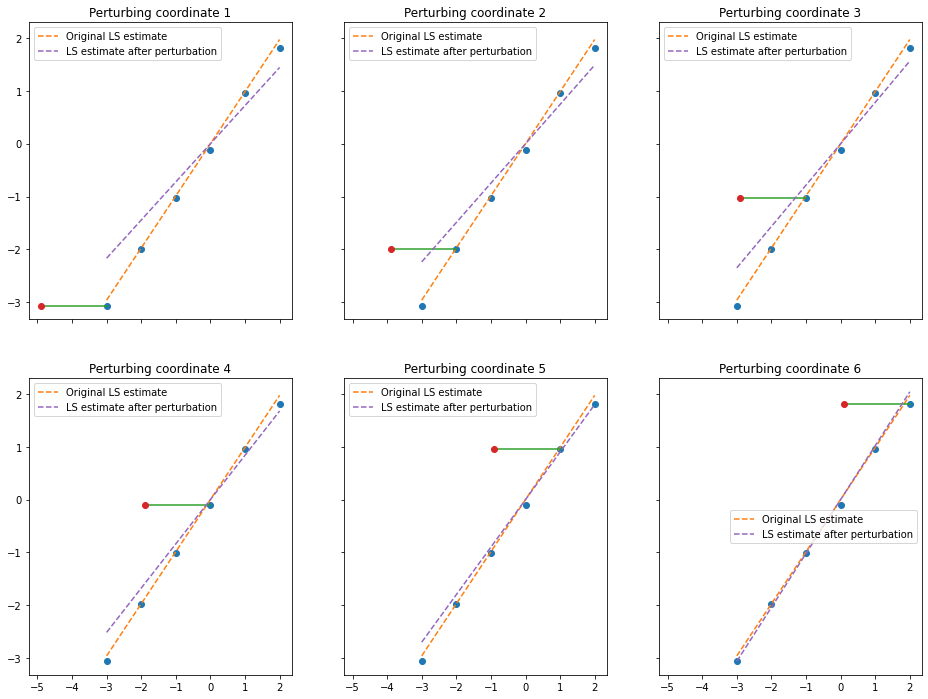

In [55]:
x   = np.arange(-3,3,dtype=np.float).reshape( (n,1)) # column vector
# x  += 6  # do you think this would change the results?
n   = len(x)
noise = rng.standard_normal( x.shape )
beta   = 1
y   = x*beta + .1*noise

betaEst,_,_,_ = np.linalg.lstsq(x,y,rcond=None)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig.set_figwidth(16)
fig.set_figheight(12)

delta = -1.9

for (i,ax) in enumerate(axs.flat):
  ax.plot( x, y, 'o')
  ax.plot( x, x*betaEst, '--', label='Original LS estimate')

  xx = x.copy()
  xx[i] += delta  # perturb
  ax.plot( [x[i],xx[i]], y[i]*[1,1] )
  ax.plot( xx[i], y[i], 'o' )

  beta2,_,_,_ = np.linalg.lstsq(xx,y,rcond=None)

  ax.plot( x, x*beta2, '--', label='LS estimate after perturbation')
  ax.set_title(f'Perturbing coordinate {i+1}')
  ax.legend()